In [208]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report

In [209]:
df = pd.read_excel("C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/baza za multinominal/standardizovana baza rekodovan ishod.xlsx")

In [210]:
df['dijagnoza']=df['dijagnoza'].map({'ADHD':1, 'Dyslexia':2, 'No diagnosis':0})

In [211]:
X=df.drop(['dijagnoza', 'Unnamed: 0'], axis=1)
y=df['dijagnoza']

In [213]:
y

0      1
1      1
2      1
3      1
4      1
      ..
165    0
166    0
167    0
168    0
169    0
Name: dijagnoza, Length: 170, dtype: int64

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [215]:
#kreiramo multinomialni logit model sa lasso regularizacijom (l1). Solver 'saga' pruza ovu mogucnost da se oba parametra primene istovremeno, C je optimizacija penala (manje vrednosti jaca regularizacija)
lm = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=0.4, fit_intercept=True, intercept_scaling=1, random_state=22, solver='saga', max_iter=200, multi_class='multinomial')

In [216]:
lm.fit(X_train,y_train)

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='multinomial', n_jobs=None, penalty='l1',
                   random_state=22, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [217]:
predictions = lm.predict(X_test)

In [218]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.79      0.95      0.86        20
           2       1.00      0.70      0.82        10

    accuracy                           0.88        51
   macro avg       0.91      0.85      0.87        51
weighted avg       0.90      0.88      0.88        51



In [219]:
stopa_greske=[]
optimizacija = [0.01, 0.05, 0.09, 0.15, 0.2, 0.2, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

for i in optimizacija:
    lmc = LogisticRegression(C=i)
    lmc.fit(X_train,y_train)
    predictions = lmc.predict(X_test)
    stopa_greske.append(np.mean(predictions!=y_test))

Text(0.5, 1.0, 'Stopa greske vs Parametar optimizacije l')

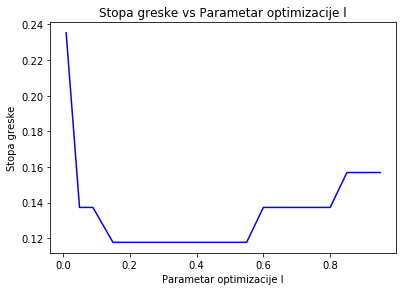

In [220]:

fig = plt.figure()

# dodajemo axes u figuri
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # velicina osa
x=optimizacija
# plotujemo ose
axes.plot(x, stopa_greske, 'b')
axes.set_xlabel('Parametar optimizacije l') # Notice the use of set_ to begin methods
axes.set_ylabel('Stopa greske')
axes.set_title('Stopa greske vs Parametar optimizacije l')

In [ ]:
#u model treba staviti c=0.01 kao najbolji parametar optimizacije

In [221]:
score = lm.score(X_test, y_test)
print("Test score with L1 penalty: %.4f" % score)

Test score with L1 penalty: 0.8824


In [222]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [223]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

In [225]:
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(LogisticRegression(penalty='l1', dual=False, 
                                                    tol=0.0001, C=0.4, fit_intercept=True, 
                                                    intercept_scaling=1, random_state=22, 
                                                    solver='saga', max_iter=200, multi_class='multinomial'))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [124]:
fpr[1]

array([0.  , 0.  , 0.  , 0.02, 0.02, 0.08, 0.08, 0.12, 0.12, 0.18, 0.18,
       0.38, 0.38, 1.  ])

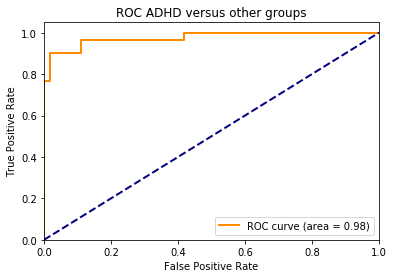

In [240]:
#ADHD u odnosu na ostale dve grupe
fig, axs = plt.subplots(figsize=(6, 4))

lw = 2
adhd = plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
adhd = plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
adhd = plt.xlim([0.0, 1.0])
adhd = plt.ylim([0.0, 1.05])
adhd = plt.xlabel('False Positive Rate')
adhd = plt.ylabel('True Positive Rate')
adhd = plt.title('ROC ADHD versus other groups')
plt.legend(loc="lower right")
plt.show()
fig.savefig('C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/baza za graf/roc_adhd.jpg')

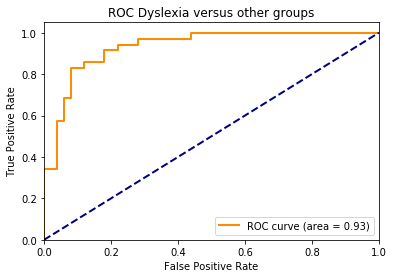

In [241]:
#Disleksija u odnosu na ostale dve grupe
fig, axs = plt.subplots(figsize=(6, 4))
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Dyslexia versus other groups')
plt.legend(loc="lower right")
plt.show()
fig.savefig('C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/baza za graf/roc_dyslexia.png', dpi=500)

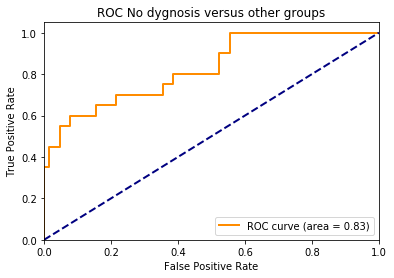

In [243]:
#Tipicni u odnosu na ostale dve grupe
fig, axs = plt.subplots(figsize=(6, 4))
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC No dygnosis versus other groups')
plt.legend(loc="lower right")
plt.show()
fig.savefig('C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/baza za graf/roc_no_dygnosis.png', dpi=200)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  import sys


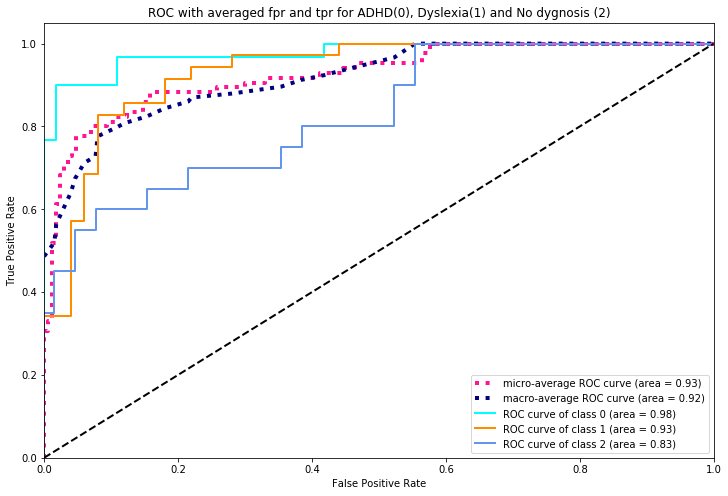

In [247]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
fig, axs = plt.subplots(figsize=(12, 8))   
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

 
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC with averaged fpr and tpr for ADHD(0), Dyslexia(1) and No dygnosis (2)')
plt.legend(loc="lower right")
plt.show()
fig.savefig('C:/Users/vitomir.jovanovic.COP/Desktop/ADHD/baza za graf/roc_sve.jpg', dpi=500)